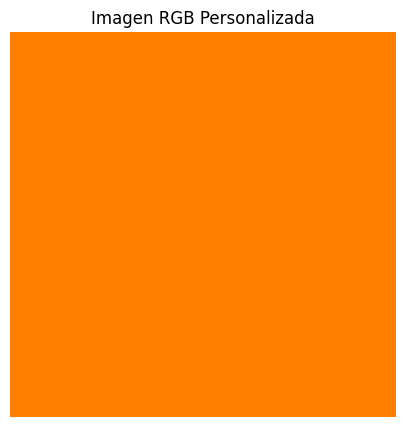

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]
path = "Gat.jpg"

tamano_imagen = 100
R = np.ones((tamano_imagen, tamano_imagen)) * 255   
G = np.ones((tamano_imagen, tamano_imagen)) * 128   
B = np.ones((tamano_imagen, tamano_imagen)) * 0     

imagen_rgb_personalizada = np.dstack((R, G, B))
imagen_rgb_personalizada = np.array(imagen_rgb_personalizada, dtype=int)

plt.figure()
plt.axis('off')
plt.imshow(imagen_rgb_personalizada)
plt.title("Imagen RGB Personalizada")
plt.show()

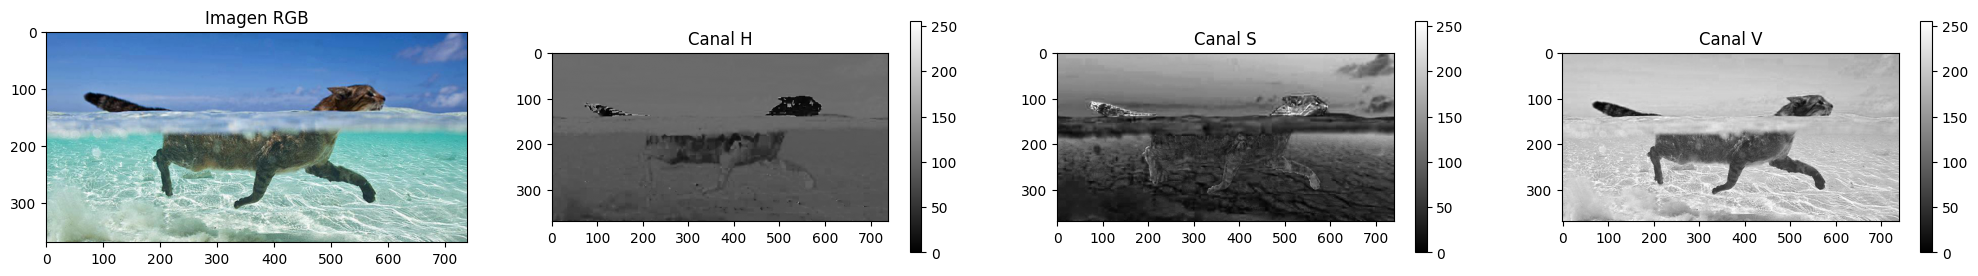

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]
path = "Gat.jpg"
imagen = cv2.imread(path)

img_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

fig, axs = plt.subplots(1, 4, figsize=(25, 10))

axs[0].imshow(img_rgb)
axs[0].set_title("Imagen RGB")

im0 = axs[1].imshow(img_hsv[..., 0], cmap="gray", vmin=0, vmax=255)
fig.colorbar(im0, ax=axs[1], shrink=0.3)
axs[1].set_title("Canal H")

im1 = axs[2].imshow(img_hsv[..., 1], cmap="gray", vmin=0, vmax=255)
fig.colorbar(im1, ax=axs[2], shrink=0.3)
axs[2].set_title("Canal S")

im2 = axs[3].imshow(img_hsv[..., 2], cmap="gray", vmin=0, vmax=255)
fig.colorbar(im2, ax=axs[3], shrink=0.3)
axs[3].set_title("Canal V")

plt.show()

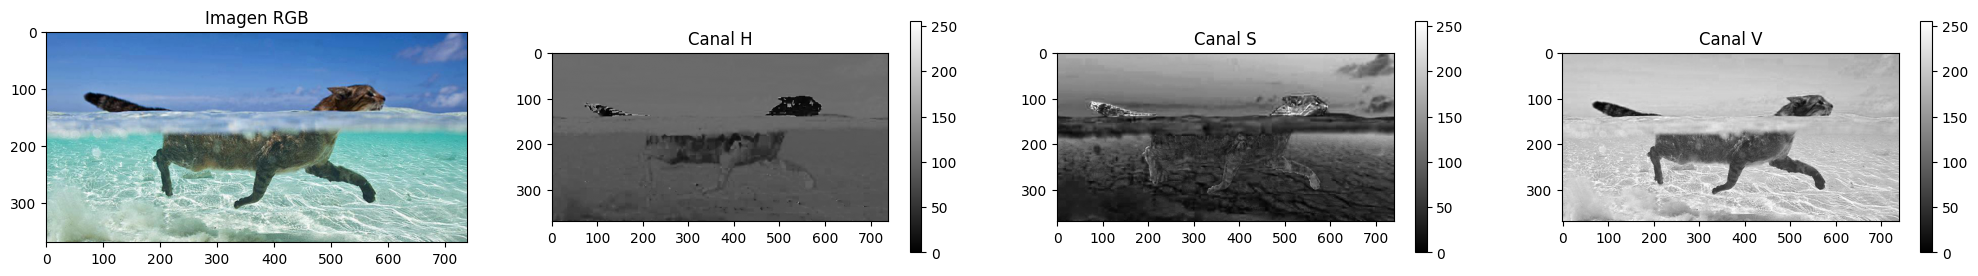

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
path = "Gat.jpg"
imagen = cv2.imread(path)

img_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

fig, axs = plt.subplots(1, 4, figsize=(25, 10))

axs[0].imshow(img_rgb)
axs[0].set_title("Imagen RGB")

im0 = axs[1].imshow(img_hsv[..., 0], cmap="gray", vmin=0, vmax=255)
fig.colorbar(im0, ax=axs[1], shrink=0.3)
axs[1].set_title("Canal H")

im1 = axs[2].imshow(img_hsv[..., 1], cmap="gray", vmin=0, vmax=255)
fig.colorbar(im1, ax=axs[2], shrink=0.3)
axs[2].set_title("Canal S")

im2 = axs[3].imshow(img_hsv[..., 2], cmap="gray", vmin=0, vmax=255)
fig.colorbar(im2, ax=axs[3], shrink=0.3)
axs[3].set_title("Canal V")

plt.show()

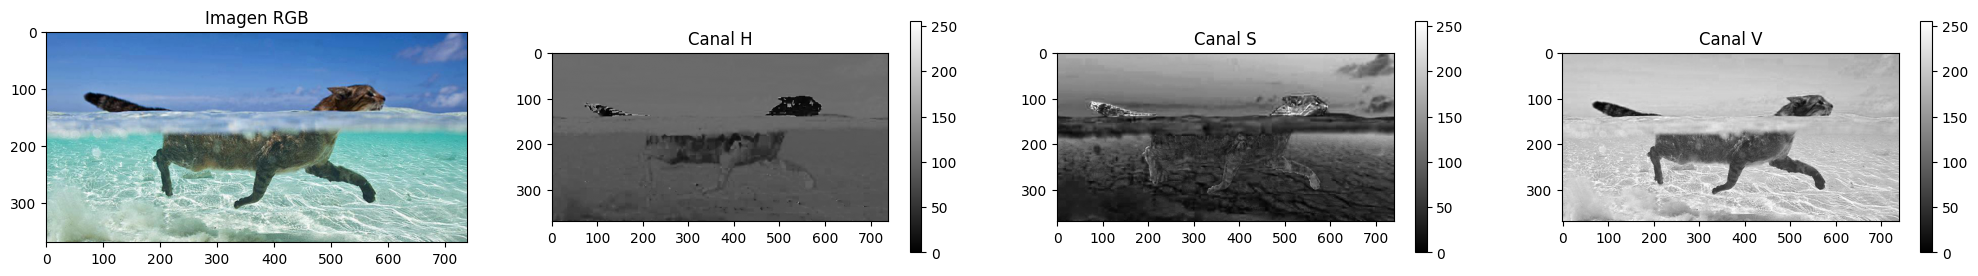

In [6]:
plt.rcParams['figure.figsize'] = [10, 5]
path = "Gat.jpg"
imagen = cv2.imread(path)

img_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

fig, axs = plt.subplots(1, 4, figsize=(25, 10))

axs[0].imshow(img_rgb)
axs[0].set_title("Imagen RGB")

im0 = axs[1].imshow(img_hsv[..., 0], cmap="gray", vmin=0, vmax=255)
fig.colorbar(im0, ax=axs[1], shrink=0.3)
axs[1].set_title("Canal H")

im1 = axs[2].imshow(img_hsv[..., 1], cmap="gray", vmin=0, vmax=255)
fig.colorbar(im1, ax=axs[2], shrink=0.3)
axs[2].set_title("Canal S")

im2 = axs[3].imshow(img_hsv[..., 2], cmap="gray", vmin=0, vmax=255)
fig.colorbar(im2, ax=axs[3], shrink=0.3)
axs[3].set_title("Canal V")

plt.show()

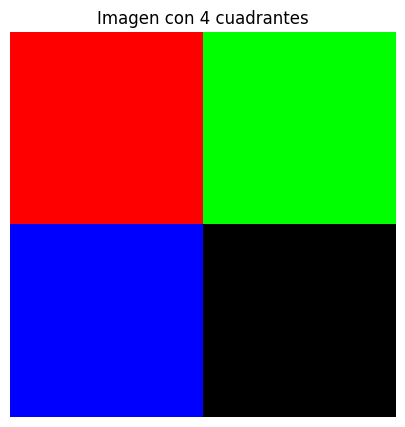

False

In [7]:
tamano_imagen = 100
imagen_cuadrantes = np.zeros((tamano_imagen, tamano_imagen, 3), dtype=int)
# Cuadrante superior izquierdo: rojo
imagen_cuadrantes[:tamano_imagen//2, :tamano_imagen//2] = [255, 0, 0]
imagen_cuadrantes[:tamano_imagen//2, tamano_imagen//2:] = [0, 255, 0]
imagen_cuadrantes[tamano_imagen//2:, :tamano_imagen//2] = [0, 0, 255]
plt.figure()
plt.axis('off')
plt.imshow(imagen_cuadrantes)
plt.title("Imagen con 4 cuadrantes")
plt.show()

cv2.imwrite("imagenes/gr_prof_color/cuadrantes.jpeg", imagen_cuadrantes)

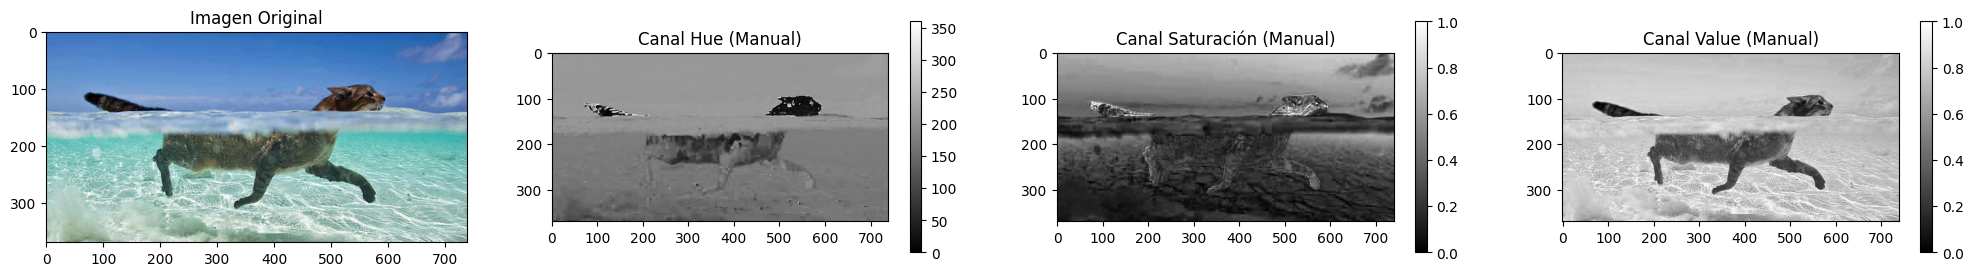

In [9]:
def RGB2HSV(img):
    img = img.astype(np.float32) / 255.0
    new_img = np.zeros_like(img)

    maxChannel = np.argmax(img, axis=2)
    maxValue = np.amax(img, axis=2)
    minValue = np.amin(img, axis=2)

    new_img[..., 2] = maxValue

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if maxValue[i, j] == 0:
                new_img[i, j, 1] = 0
            else:
                new_img[i, j, 1] = (maxValue[i, j] - minValue[i, j]) / maxValue[i, j]

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if maxValue[i, j] == minValue[i, j]:
                new_img[i, j, 0] = 0
            else:
                if maxChannel[i, j] == 0: 
                    new_img[i, j, 0] = 60 * ((img[i, j, 1] - img[i, j, 2]) / (maxValue[i, j] - minValue[i, j]))
                elif maxChannel[i, j] == 1: 
                    new_img[i, j, 0] = 120 + 60 * ((img[i, j, 2] - img[i, j, 0]) / (maxValue[i, j] - minValue[i, j]))
                elif maxChannel[i, j] == 2:  
                    new_img[i, j, 0] = 240 + 60 * ((img[i, j, 0] - img[i, j, 1]) / (maxValue[i, j] - minValue[i, j]))
                if new_img[i, j, 0] < 0:
                    new_img[i, j, 0] += 360
    return new_img

imagen_leida = cv2.imread("Gat.jpg", cv2.IMREAD_COLOR)
img_rgb_leida = cv2.cvtColor(imagen_leida, cv2.COLOR_BGR2RGB)
hsv_manual = RGB2HSV(img_rgb_leida)

fig, axs = plt.subplots(1, 4, figsize=(25, 10))
axs[0].imshow(img_rgb_leida)
axs[0].set_title("Imagen Original")

im_hue = axs[1].imshow(hsv_manual[..., 0], cmap='gray', vmin=0, vmax=360)
fig.colorbar(im_hue, ax=axs[1], shrink=0.3)
axs[1].set_title("Canal Hue (Manual)")

im_sat = axs[2].imshow(hsv_manual[..., 1], cmap='gray', vmin=0, vmax=1)
fig.colorbar(im_sat, ax=axs[2], shrink=0.3)
axs[2].set_title("Canal Saturación (Manual)")

im_val = axs[3].imshow(hsv_manual[..., 2], cmap='gray', vmin=0, vmax=1)
fig.colorbar(im_val, ax=axs[3], shrink=0.3)
axs[3].set_title("Canal Value (Manual)")

plt.show()



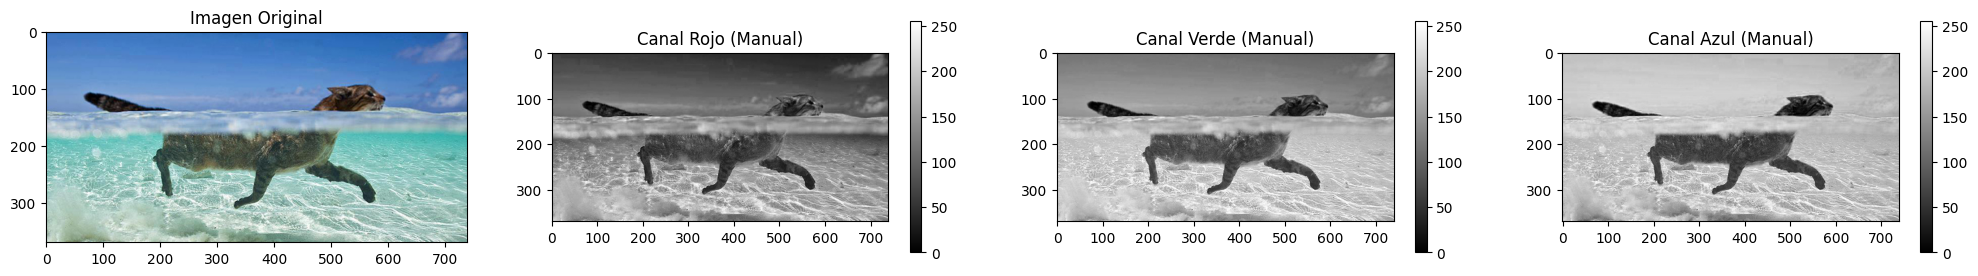

In [10]:
def HSV2RGB(img):
    img = img.copy()  
    new_img = np.zeros_like(img)
    
    C = img[..., 2] * img[..., 1]
    X = C * (1 - np.abs((img[..., 0] / 60) % 2 - 1))
    m = img[..., 2] - C
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            h = img[i, j, 0]
            if 0 <= h < 60:
                r, g, b = C[i, j], X[i, j], 0
            elif 60 <= h < 120:
                r, g, b = X[i, j], C[i, j], 0
            elif 120 <= h < 180:
                r, g, b = 0, C[i, j], X[i, j]
            elif 180 <= h < 240:
                r, g, b = 0, X[i, j], C[i, j]
            elif 240 <= h < 300:
                r, g, b = X[i, j], 0, C[i, j]
            elif 300 <= h < 360:
                r, g, b = C[i, j], 0, X[i, j]
            new_img[i, j, 0] = r
            new_img[i, j, 1] = g
            new_img[i, j, 2] = b

    new_img[..., 0] = (new_img[..., 0] + m) * 255
    new_img[..., 1] = (new_img[..., 1] + m) * 255
    new_img[..., 2] = (new_img[..., 2] + m) * 255
    new_img = new_img.astype(int)
    return new_img

rgb_manual = HSV2RGB(hsv_manual)

fig, axs = plt.subplots(1, 4, figsize=(25, 10))
axs[0].imshow(img_rgb_leida)
axs[0].set_title("Imagen Original")

im_r = axs[1].imshow(rgb_manual[..., 0], cmap='gray', vmin=0, vmax=255)
fig.colorbar(im_r, ax=axs[1], shrink=0.3)
axs[1].set_title("Canal Rojo (Manual)")

im_g = axs[2].imshow(rgb_manual[..., 1], cmap='gray', vmin=0, vmax=255)
fig.colorbar(im_g, ax=axs[2], shrink=0.3)
axs[2].set_title("Canal Verde (Manual)")

im_b = axs[3].imshow(rgb_manual[..., 2], cmap='gray', vmin=0, vmax=255)
fig.colorbar(im_b, ax=axs[3], shrink=0.3)
axs[3].set_title("Canal Azul (Manual)")

plt.show()

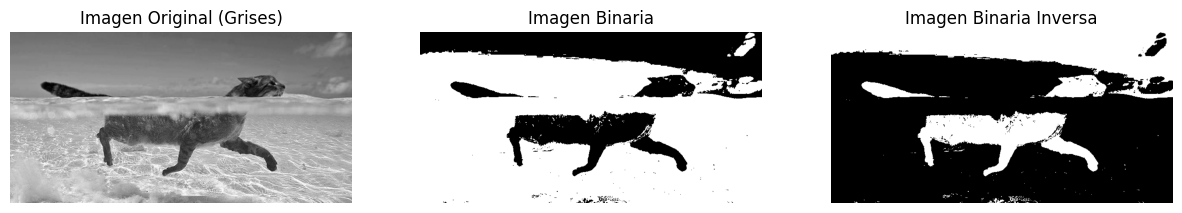

In [11]:
imagen_umbral = cv2.imread(r"Gat.jpg", 0)

_, umbralbinario = cv2.threshold(imagen_umbral, 124, 255, cv2.THRESH_BINARY)

_, umbralbinarioInverso = cv2.threshold(imagen_umbral, 124, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen_umbral, cmap="gray")
plt.title("Imagen Original (Grises)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(umbralbinario, cmap="gray")
plt.title("Imagen Binaria")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(umbralbinarioInverso, cmap="gray")
plt.title("Imagen Binaria Inversa")
plt.axis('off')

plt.show()